In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/melbourne-housing-snapshot/melb_data.csv


In [2]:
# Read the data
data = pd.read_csv('../input/melbourne-housing-snapshot/melb_data.csv')

# Select subset of predictors
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]

# Select target
y = data.Price

In [3]:
print(X.shape)

(13580, 5)


In [4]:
# Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50, random_state=0))
                             ])

In [8]:
# Scores by experiment
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [336613.56178706 247195.16527848 324352.06357251 281839.55614557
 282995.95324245 286902.38059543 225398.18463112 234733.68408017
 231765.60086929 268925.9477011 ]


In [9]:
print("Average MAE score (across experiments):")
print(scores.mean())

# Con cv =  5, 277707.3795913405
# Con cv = 10, 272072.20979031955

Average MAE score (across experiments):
272072.20979031955


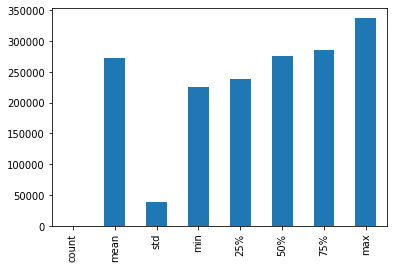

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.Series(scores).describe().plot(kind='bar')
plt.show()

## When should you use cross-validation?

* For small datasets, where extra computational burden isn't a big deal, you should run cross-validation.
* For larger datasets, a single validation set is sufficient. Your code will run faster, and you may have enough data that there's little need to re-use some of it for holdout.

There's no simple threshold for what constitutes a large vs. small dataset. But if your model takes a couple minutes or less to run, it's probably worth switching to cross-validation.

Alternatively, you can run cross-validation and see if the scores for each experiment seem close. If each experiment yields the same results, a single validation set is probably sufficient.